## Notebook Setup

In [11]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [12]:
df_profiles = pd.read_pickle('C:/Users/Sam/Documents/_Data Analytics Projects/02 Data/OPC_scrubbed_profiled.pkl')

In [13]:
df_profiles.head()

product_id  department_id  prices  user_id  order_number  \
0           1             19     5.8      138            28   
1           1             19     5.8      138            30   
2           1             19     5.8      709             2   
3           1             19     5.8      764             1   
4           1             19     5.8      764             3   

   order_day_of_week  order_hour_of_day  days_since_last_order  reordered  \
0                  6                 11                    3.0          0   
1                  6                 17                   20.0          1   
2                  0                 21                    6.0          0   
3                  3                 13                    NaN          0   
4                  4                 17                    9.0          1   

         price_range  ... age num_dependents fam_status  income     Region  \
0  mid-range product  ...  81              1    married   49620    Midwest   
1  mid-range product  ...  81              1    married   49620    Midwest   
2  mid-range product  ...  66              2    married  158302  Northeast   
3  mid-range product  ...  40              3    married   31308    Midwest   
4  mid-range product  ...  40              3    married   31308    Midwest   

           age_group   income_group  dependent_status  \
0        Older Adult     Low-Income            Parent   
1        Older Adult     Low-Income            Parent   
2        Older Adult  Middle-Income            Parent   
3  Middle-Aged Adult     Low-Income            Parent   
4  Middle-Aged Adult     Low-Income            Parent   

                 income_profile          dependent_profile  
0        Low-Income Older Adult        Older Adult, Parent  
1        Low-Income Older Adult        Older Adult, Parent  
2     Middle-Income Older Adult        Older Adult, Parent  
3  Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  
4  Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  

[5 rows x 27 columns]

In [14]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32398590 entries, 0 to 32404858
Data columns (total 27 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   product_id             int64   
 1   department_id          int64   
 2   prices                 float64 
 3   user_id                int64   
 4   order_number           int64   
 5   order_day_of_week      int64   
 6   order_hour_of_day      int64   
 7   days_since_last_order  float64 
 8   reordered              int64   
 9   price_range            category
 10  busiest days           object  
 11  busiest day            category
 12  busiest_period_of_day  object  
 13  loyalty_flag           category
 14  spending_flag          category
 15  freq_flag              category
 16  Gender                 category
 17  age                    int64   
 18  num_dependents         int64   
 19  fam_status             category
 20  income                 int64   
 21  Region                 category
 2

## Visualizations of Customer Profile Distribution

### Income Profiling

<Axes: xlabel='income_profile'>

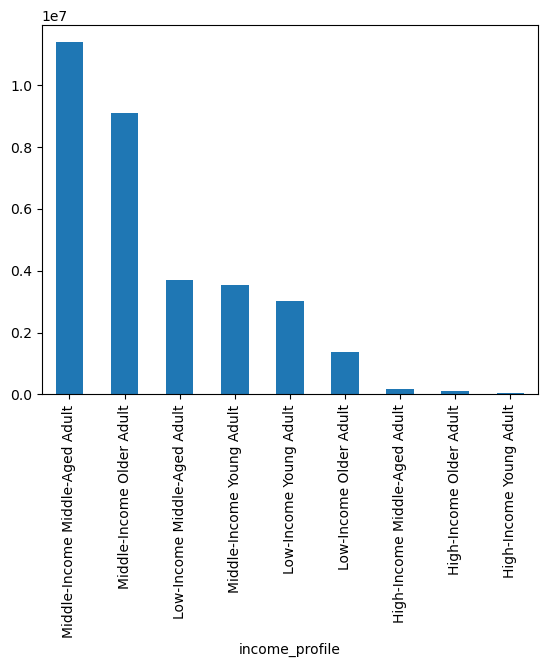

In [17]:
# bar chart of income profile
df_profiles['income_profile'].value_counts().plot.bar()

Key Takeaway: High-income individuals aren't order products at the same rate as middle- and low-income customers, although this could be due to the number of high-income individuals. At any rate, the primary customers are middle-and-low income individuals.

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\537494638.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_spending = df_profiles.groupby('income_profile')['prices'].sum()


Text(0.5, 1.0, 'Total Spending by Customer Income Profile')

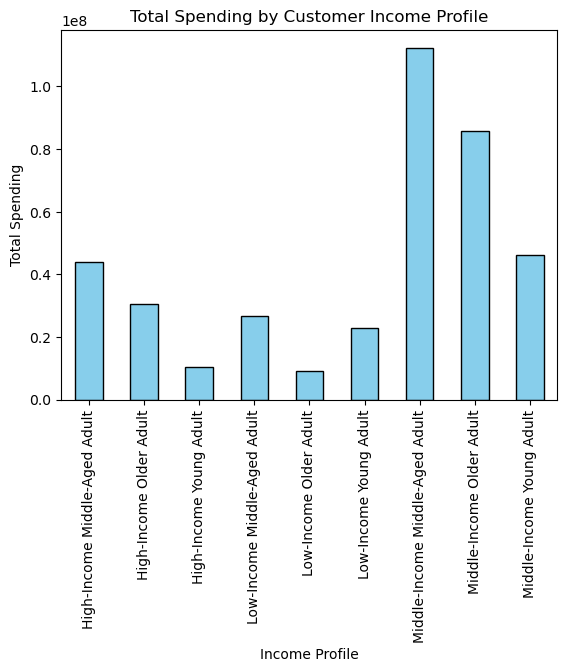

In [19]:
## Spending habits of each group
profile_spending = df_profiles.groupby('income_profile')['prices'].sum()
spending_habits_by_income = profile_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Income Profile')
plt.ylabel('Total Spending')
plt.title('Total Spending by Customer Income Profile')

The graph above shows that middle-income customers are spending the most on Instacart orders. High- and low-income customers, interestingly enough, are spending about the same.

In [21]:
spending_habits_by_income.figure.savefig('C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/spending_habits_by_income_profile.png')

### Dependency Profiles

<Axes: xlabel='dependent_profile'>

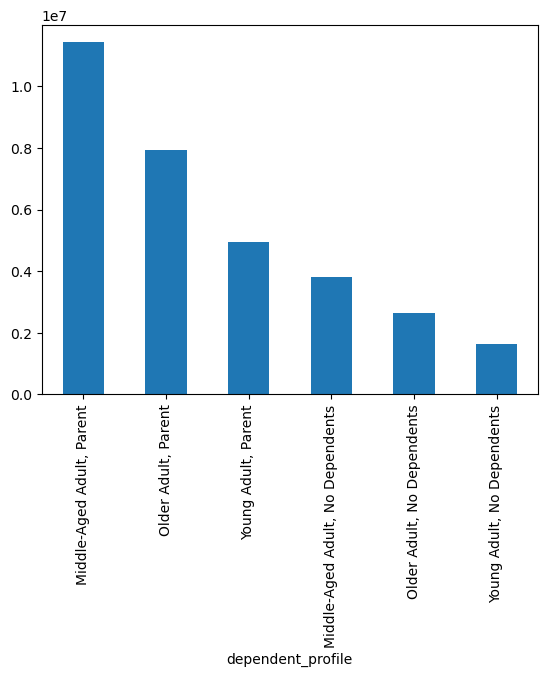

In [23]:
df_profiles['dependent_profile'].value_counts().plot.bar()

Parents (or anyone with dependents) appear much more likely to order from Instacart than those who don't have dependents.

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\2051359180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dep_profile_spending = df_profiles.groupby('dependent_profile')['prices'].sum().sort_index()


Text(0.5, 1.0, 'Total Spending by Customer Dependent Profile')

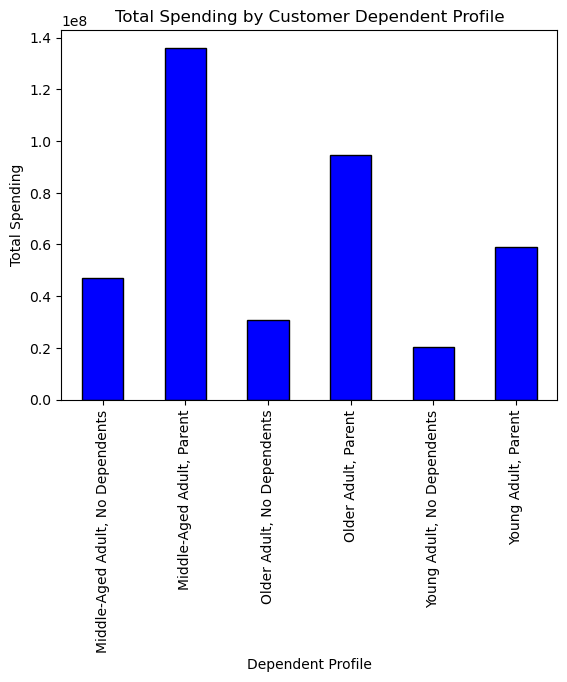

In [25]:
## Spending habits of each group
dep_profile_spending = df_profiles.groupby('dependent_profile')['prices'].sum().sort_index()
spending_habits_by_dependents = dep_profile_spending.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Dependent Profile')
plt.ylabel('Total Spending')
plt.title('Total Spending by Customer Dependent Profile')

Parents also spend the most money ordering from Instacart.

In [27]:
spending_habits_by_dependents.figure.savefig('C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/spending_habits_by_dependent_profile.png')

## Usage Frequency and Expenditure Aggregate Statistics (DISREGARD, AMENDED BELOW)

In [29]:
customer_profile_stats = df_profiles.groupby('income_profile').agg({
    'order_number':['max', 'min', 'mean'],
    'prices': ['max', 'min', 'mean']})

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\3662932467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_profile_stats = df_profiles.groupby('income_profile').agg({


In [30]:
customer_profile_stats

order_number                  prices       \
                                         max min       mean      max  min   
income_profile                                                              
High-Income Middle-Aged Adult             99   1  19.772606  99999.0  1.0   
High-Income Older Adult                   99   1  20.023058  99999.0  1.0   
High-Income Young Adult                   99   1  17.909318  99999.0  1.0   
Low-Income Middle-Aged Adult              99   1  16.894383  14900.0  1.0   
Low-Income Older Adult                    99   1  15.825501     25.0  1.0   
Low-Income Young Adult                    99   1  16.732172  14900.0  1.0   
Middle-Income Middle-Aged Adult           99   1  17.254878  99999.0  1.0   
Middle-Income Older Adult                 99   1  17.298192  99999.0  1.0   
Middle-Income Young Adult                 99   1  17.303186  99999.0  1.0   

                                             
                                       mean  
income_profile                               
High-Income Middle-Aged Adult    272.367154  
High-Income Older Adult          252.028416  
High-Income Young Adult          269.890515  
Low-Income Middle-Aged Adult       7.271635  
Low-Income Older Adult             6.697356  
Low-Income Young Adult             7.587619  
Middle-Income Middle-Aged Adult    9.888195  
Middle-Income Older Adult          9.430261  
Middle-Income Young Adult         13.099232

In [31]:
customer_profile_stats.to_clipboard

<bound method NDFrame.to_clipboard of                                 order_number                  prices       \
                                         max min       mean      max  min   
income_profile                                                              
High-Income Middle-Aged Adult             99   1  19.772606  99999.0  1.0   
High-Income Older Adult                   99   1  20.023058  99999.0  1.0   
High-Income Young Adult                   99   1  17.909318  99999.0  1.0   
Low-Income Middle-Aged Adult              99   1  16.894383  14900.0  1.0   
Low-Income Older Adult                    99   1  15.825501     25.0  1.0   
Low-Income Young Adult                    99   1  16.732172  14900.0  1.0   
Middle-Income Middle-Aged Adult           99   1  17.254878  99999.0  1.0   
Middle-Income Older Adult                 99   1  17.298192  99999.0  1.0   
Middle-Income Young Adult                 99   1  17.303186  99999.0  1.0   

                                     

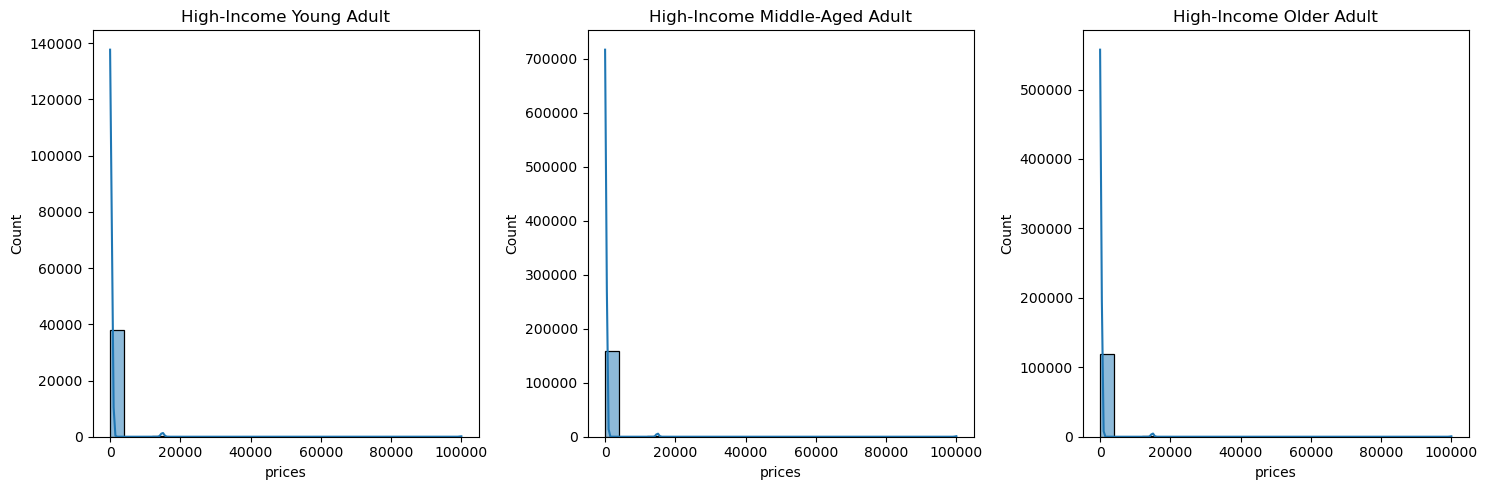

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each high-income profile
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot histograms with specified bins for each profile
sns.histplot(df_profiles[df_profiles['income_profile'] == 'High-Income Young Adult']['prices'], ax=axes[0], bins=25, kde=True)
axes[0].set_title('High-Income Young Adult')

sns.histplot(df_profiles[df_profiles['income_profile'] == 'High-Income Middle-Aged Adult']['prices'], ax=axes[1], bins=25, kde=True)
axes[1].set_title('High-Income Middle-Aged Adult')

sns.histplot(df_profiles[df_profiles['income_profile'] == 'High-Income Older Adult']['prices'], ax=axes[2], bins=25, kde=True)
axes[2].set_title('High-Income Older Adult')

plt.tight_layout()
plt.show()

In [33]:
df_profiles[df_profiles['income_profile'] == 'High-Income Young Adult']['prices'].describe()


count    38354.000000
mean       269.890515
std       3626.684091
min          1.000000
25%          4.400000
50%          7.500000
75%         11.400000
max      99999.000000
Name: prices, dtype: float64

In [34]:
df_profiles[df_profiles['income_profile'] == 'High-Income Middle-Aged Adult']['prices'].describe()

count    161174.000000
mean        272.367154
std        3908.162131
min           1.000000
25%           4.300000
50%           7.400000
75%          11.300000
max       99999.000000
Name: prices, dtype: float64

In [35]:
df_profiles[df_profiles['income_profile'] == 'High-Income Older Adult']['prices'].describe()

count    120913.000000
mean        252.028416
std        3557.557858
min           1.000000
25%           4.200000
50%           7.400000
75%          11.400000
max       99999.000000
Name: prices, dtype: float64

In [36]:
sns.scatterplot(x='prices', y='prices', data=df_profiles[df_profiles['income_profile'] == 'High-Income Young Adult']['prices'])

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [ ]:
df_high_income.shape

In [ ]:
sns.scatterplot(x='prices', y='prices', data=df_high_income)

## Brief Interlude to Create Profile Dataframes

I realize here that it would be beneficial to create separate dataframes for each profile. I'm going to make two dictionaries, one containing income-based profiles and the other containing dependent-based profiles. This will allow me to access each profile's data quicker than the method I tried above.

### Income Profiles

In [49]:
#Create dictionary for INCOME profile Dataframes
income_profile_dfs = {}

# Add new dataframes to dictionary

## young adult income profiles
income_profile_dfs['df_high_income_YA'] = df_profiles[df_profiles['income_profile'] == 'High-Income Young Adult']
income_profile_dfs['df_middle_income_YA'] = df_profiles[df_profiles['income_profile'] == 'Middle-Income Young Adult']
income_profile_dfs['df_low_income_YA'] = df_profiles[df_profiles['income_profile'] == 'Low-Income Young Adult']

## middle-aged adult income profiles
income_profile_dfs['df_high_income_MA'] = df_profiles[df_profiles['income_profile'] == 'High-Income Middle-Aged Adult']
income_profile_dfs['df_middle_income_MA'] = df_profiles[df_profiles['income_profile'] == 'Middle-Income Middle-Aged Adult']
income_profile_dfs['df_low_income_MA'] = df_profiles[df_profiles['income_profile'] == 'Low-Income Middle-Aged Adult']

## older adult income profiles
income_profile_dfs['df_high_income_OA'] = df_profiles[df_profiles['income_profile'] == 'High-Income Older Adult']
income_profile_dfs['df_middle_income_OA'] = df_profiles[df_profiles['income_profile'] == 'Middle-Income Older Adult']
income_profile_dfs['df_low_income_OA'] = df_profiles[df_profiles['income_profile'] == 'Low-Income Older Adult']

In [50]:
# Assign INCOME profiles to variables
df_HI_YA = income_profile_dfs['df_high_income_YA']
df_MI_YA = income_profile_dfs['df_middle_income_YA']
df_LI_YA = income_profile_dfs['df_low_income_YA']
df_HI_MA = income_profile_dfs['df_high_income_MA']
df_MI_MA = income_profile_dfs['df_middle_income_MA']
df_LI_MA = income_profile_dfs['df_low_income_MA']
df_HI_OA = income_profile_dfs['df_high_income_OA']
df_MI_OA = income_profile_dfs['df_middle_income_OA']
df_LI_OA = income_profile_dfs['df_low_income_OA']

In [51]:
df_HI_YA.shape

(38354, 27)

In [52]:
df_MI_YA.shape

(3529375, 27)

In [53]:
df_LI_YA.shape

(3030283, 27)

### Dependent Profiles

In [55]:
df_profiles['dependent_profile'].value_counts()

dependent_profile
Middle-Aged Adult, Parent           11421944
Older Adult, Parent                  7926671
Young Adult, Parent                  4954046
Middle-Aged Adult, No Dependents     3797891
Older Adult, No Dependents           2654072
Young Adult, No Dependents           1643966
Name: count, dtype: int64

In [56]:
# Create Dictionary for Dependent profiles
dependent_profile_dfs = {}

# Add dataframes to dictionary
dependent_profile_dfs['df_parent_YA'] = df_profiles[df_profiles['dependent_profile'] == 'Young Adult, Parent']
dependent_profile_dfs['df_parent_MA'] = df_profiles[df_profiles['dependent_profile'] == 'Middle-Aged Adult, Parent']
dependent_profile_dfs['df_parent_OA'] = df_profiles[df_profiles['dependent_profile'] == 'Older Adult, Parent']
dependent_profile_dfs['df_no_deps_YA'] = df_profiles[df_profiles['dependent_profile'] == 'Young Adult, No Dependents']
dependent_profile_dfs['df_no_deps_MA'] = df_profiles[df_profiles['dependent_profile'] == 'Young Adult, No Dependents']
dependent_profile_dfs['df_no_deps_OA'] = df_profiles[df_profiles['dependent_profile'] == 'Young Adult, No Dependents']

In [62]:
# Assign dictionary dataframes to variables
df_parent_YA = dependent_profile_dfs['df_parent_YA']
df_parent_MA = dependent_profile_dfs['df_parent_MA']
df_parent_OA = dependent_profile_dfs['df_parent_OA']
df_no_deps_YA = dependent_profile_dfs['df_no_deps_YA']
df_no_deps_MA = dependent_profile_dfs['df_no_deps_MA']
df_no_deps_OA = dependent_profile_dfs['df_no_deps_OA']

In [63]:
print(dependent_profile_dfs.keys())

dict_keys(['df_parent_YA', 'df_parent_MA', 'df_parent_OA', 'df_no_deps_YA', 'df_no_deps_MA', 'df_no_deps_OA'])


In [64]:
print(income_profile_dfs.keys())

dict_keys(['df_high_income_YA', 'df_middle_income_YA', 'df_low_income_YA', 'df_high_income_MA', 'df_middle_income_MA', 'df_low_income_MA', 'df_high_income_OA', 'df_middle_income_OA', 'df_low_income_OA'])


In [65]:
df_HI_YA.shape

(38354, 27)

## Usage Frequency and Expenditure Aggregate Statistics (Take 2)

In [73]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32398590 entries, 0 to 32404858
Data columns (total 27 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   product_id             int64   
 1   department_id          int64   
 2   prices                 float64 
 3   user_id                int64   
 4   order_number           int64   
 5   order_day_of_week      int64   
 6   order_hour_of_day      int64   
 7   days_since_last_order  float64 
 8   reordered              int64   
 9   price_range            category
 10  busiest days           object  
 11  busiest day            category
 12  busiest_period_of_day  object  
 13  loyalty_flag           category
 14  spending_flag          category
 15  freq_flag              category
 16  Gender                 category
 17  age                    int64   
 18  num_dependents         int64   
 19  fam_status             category
 20  income                 int64   
 21  Region                 category
 2

In [75]:
# Defining functions to calculate profile metrics

## Descriptive Statistics for spending using 'prices" column
def get_descriptive_stats(df):
    return df['prices'].describe()

## Total spending for each profile
def get_total_spending(df):
    return df['prices'].sum()

## Finds the most ordered department for the profile
def get_most_ordered_department(df):
    return df['department_id'].mode()

## Average days between orders for the profile
def get_order_frequency(df):
    return df['days_since_last_order'].mean()

In [77]:
# Main function to analyze profile data
def analyze_profile_data(profile_dfs):
    results = []
    for profile_name, df in profile_dfs.items():
        desc_stats = get_descriptive_stats(df)
        total_spending = get_total_spending(df)
        most_ordered_department = get_most_ordered_department(df)
        avg_days_between_orders = get_order_frequency(df)

# Create a dictionary to store the results for the current profile
        profile_results = {
            'customer_profile': profile_name,
            'max_price': desc_stats['max'],
            'average_price': desc_stats['mean'],
            'min_price': desc_stats['min'],
            '25th_percentile_price': desc_stats['25%'],
            'median_price': desc_stats['50%'],
            '75th_percentile_price': desc_stats['75%'],
            'total_spending': total_spending,
            'most_ordered_department': most_ordered_department,
            'avg_days_between_orders': avg_days_between_orders}

# Append the dictionary to the results list
        results.append(profile_results)

    # Create a DataFrame from the results
    df_profile_stats = pd.DataFrame(results)

    return df_profile_stats

In [79]:
## Apply analysis to dictionaries
income_profile_stats = analyze_profile_data(income_profile_dfs)
dependent_profile_stats = analyze_profile_data(dependent_profile_dfs)

In [80]:
print("Income Profile Stats:")
print(income_profile_stats.to_markdown(index=False, numalign="center", stralign="center"))

print("\nDependent Profile Stats:")
print(dependent_profile_stats.to_markdown(index=False, numalign="center", stralign="center"))

Income Profile Stats:
|  customer_profile   |  max_price  |  average_price  |  min_price  |  25th_percentile_price  |  median_price  |  75th_percentile_price  |  total_spending  |  most_ordered_department  |  avg_days_between_orders  |
|:-------------------:|:-----------:|:---------------:|:-----------:|:-----------------------:|:--------------:|:-----------------------:|:----------------:|:-------------------------:|:-------------------------:|
|  df_high_income_YA  |    99999    |     269.891     |      1      |           4.4           |      7.5       |          11.4           |   1.03514e+07    |             4             |          10.6263          |
| df_middle_income_YA |    99999    |     13.0992     |      1      |           4.4           |      7.7       |          11.4           |   4.62321e+07    |             4             |          11.0352          |
|  df_low_income_YA   |    14900    |     7.58762     |      1      |            4            |      7.1       |          

C:\Users\Sam\anaconda3\Lib\site-packages\tabulate\__init__.py:827: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  conv(string)
C:\Users\Sam\anaconda3\Lib\site-packages\tabulate\__init__.py:1232: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return format(float(val), floatfmt)


In [81]:
income_profile_stats.head(20)

customer_profile  max_price  average_price  min_price  \
0    df_high_income_YA    99999.0     269.890515        1.0   
1  df_middle_income_YA    99999.0      13.099232        1.0   
2     df_low_income_YA    14900.0       7.587619        1.0   
3    df_high_income_MA    99999.0     272.367154        1.0   
4  df_middle_income_MA    99999.0       9.888195        1.0   
5     df_low_income_MA    14900.0       7.271635        1.0   
6    df_high_income_OA    99999.0     252.028416        1.0   
7  df_middle_income_OA    99999.0       9.430261        1.0   
8     df_low_income_OA       25.0       6.697356        1.0   

   25th_percentile_price  median_price  75th_percentile_price  total_spending  \
0                    4.4           7.5                   11.4      10351380.8   
1                    4.4           7.7                   11.4      46232103.0   
2                    4.0           7.1                   11.0      22992634.1   
3                    4.3           7.4                   11.3      43898503.6   
4                    4.4           7.7                   11.4     112418767.4   
5                    3.8           6.8                   10.5      26829954.5   
6                    4.2           7.4                   11.4      30473511.9   
7                    4.4           7.7                   11.4      85649618.2   
8                    3.4           6.0                    9.6       9224985.2   

                    most_ordered_department  avg_days_between_orders  
0  0    4
Name: department_id, dtype: int64                10.626273  
1  0    4
Name: department_id, dtype: int64                11.035157  
2  0    4
Name: department_id, dtype: int64                11.254594  
3  0    4
Name: department_id, dtype: int64                10.344266  
4  0    4
Name: department_id, dtype: int64                11.063377  
5  0    4
Name: department_id, dtype: int64                11.262829  
6  0    4
Name: department_id, dtype: int64                 9.998551  
7  0    4
Name: department_id, dtype: int64                11.016655  
8  0    4
Name: department_id, dtype: int64                11.613886

In [82]:
dependent_profile_stats.head(10)

customer_profile  max_price  average_price  min_price  \
0     df_parent_YA    99999.0      11.942967        1.0   
1     df_parent_MA    99999.0      11.915850        1.0   
2     df_parent_OA    99999.0      11.946829        1.0   
3    df_no_deps_YA    99999.0      12.415166        1.0   
4    df_no_deps_MA    99999.0      12.415166        1.0   
5    df_no_deps_OA    99999.0      12.415166        1.0   

   25th_percentile_price  median_price  75th_percentile_price  total_spending  \
0                    4.2           7.4                   11.3      59166007.4   
1                    4.2           7.4                   11.3     136102169.3   
2                    4.2           7.4                   11.3      94698584.1   
3                    4.2           7.3                   11.2      20410110.5   
4                    4.2           7.3                   11.2      20410110.5   
5                    4.2           7.3                   11.2      20410110.5   

                    most_ordered_department  avg_days_between_orders  
0  0    4
Name: department_id, dtype: int64                11.104346  
1  0    4
Name: department_id, dtype: int64                11.122702  
2  0    4
Name: department_id, dtype: int64                11.096492  
3  0    4
Name: department_id, dtype: int64                11.220672  
4  0    4
Name: department_id, dtype: int64                11.220672  
5  0    4
Name: department_id, dtype: int64                11.220672

In [83]:
df_parent_MA.head()

product_id  department_id  prices  user_id  order_number  \
3            1             19     5.8      764             1   
4            1             19     5.8      764             3   
5            1             19     5.8      777            16   
34           1             19     5.8     1598             1   
35           1             19     5.8     1598             2   

    order_day_of_week  order_hour_of_day  days_since_last_order  reordered  \
3                   3                 13                    NaN          0   
4                   4                 17                    9.0          1   
5                   1                  7                   26.0          0   
34                  2                 12                    NaN          0   
35                  2                 10                   21.0          1   

          price_range  ... age num_dependents fam_status  income   Region  \
3   mid-range product  ...  40              3    married   31308  Midwest   
4   mid-range product  ...  40              3    married   31308  Midwest   
5   mid-range product  ...  51              2    married   57797     West   
34  mid-range product  ...  41              2    married  122060  Midwest   
35  mid-range product  ...  41              2    married  122060  Midwest   

            age_group   income_group  dependent_status  \
3   Middle-Aged Adult     Low-Income            Parent   
4   Middle-Aged Adult     Low-Income            Parent   
5   Middle-Aged Adult     Low-Income            Parent   
34  Middle-Aged Adult  Middle-Income            Parent   
35  Middle-Aged Adult  Middle-Income            Parent   

                     income_profile          dependent_profile  
3      Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  
4      Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  
5      Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  
34  Middle-Income Middle-Aged Adult  Middle-Aged Adult, Parent  
35  Middle-Income Middle-Aged Adult  Middle-Aged Adult, Parent  

[5 rows x 27 columns]

In [84]:
df_parent_MA.shape

(11421944, 27)

In [85]:
df_parent_OA.shape

(7926671, 27)

## Charts for Total Spending by Profile

<Axes: xlabel='customer_profile', ylabel='total_spending'>

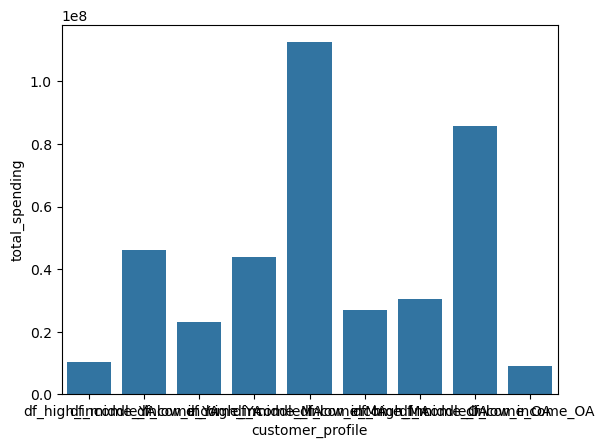

In [87]:
## Creating the bar chart for total spending
sns.barplot(x='customer_profile', y='total_spending', data = income_profile_stats)

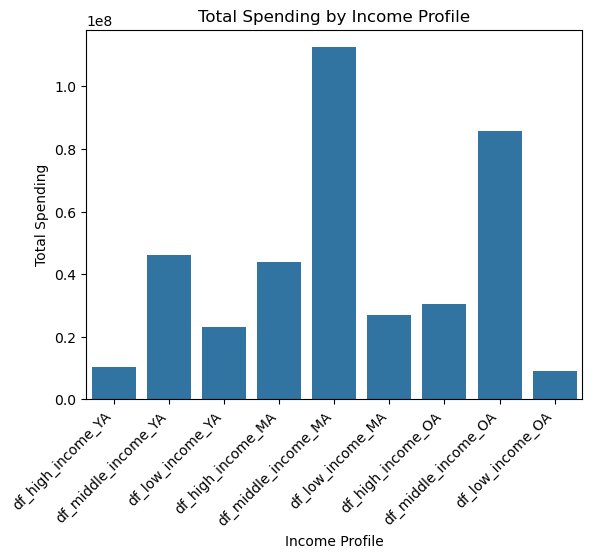

In [89]:
## Clean up the visuals
income_profile_spending_chart = sns.barplot(x='customer_profile', y='total_spending', data = income_profile_stats)

plt.xlabel('Income Profile')
plt.ylabel('Total Spending')
plt.title('Total Spending by Income Profile')
plt.xticks(rotation=45, ha='right')
plt.legend

plt.show()

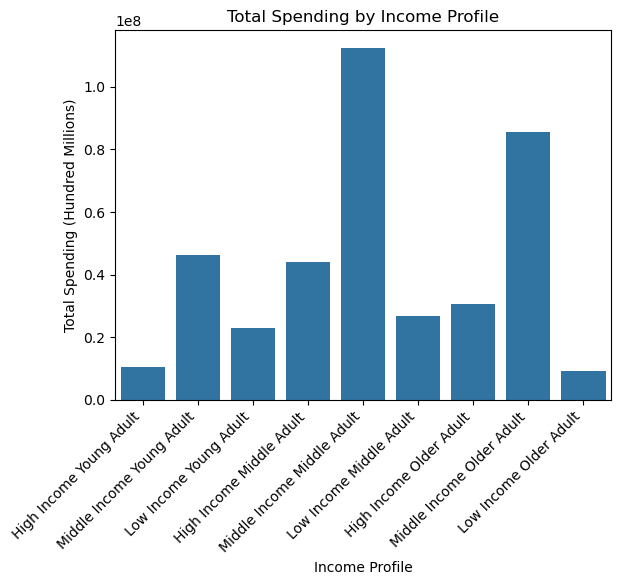

In [200]:
## Making labels more readable
x_axis_labels = ['High Income Young Adult', 'Middle Income Young Adult', 'Low Income Young Adult', 'High Income Middle Adult', 'Middle Income Middle Adult', 'Low Income Middle Adult', 'High Income Older Adult', 'Middle Income Older Adult', 'Low Income Older Adult']

income_profile_spending_chart = sns.barplot(x='customer_profile', y='total_spending', data = income_profile_stats)

plt.xlabel('Income Profile')
plt.ylabel('Total Spending (Hundred Millions)')
plt.title('Total Spending by Income Profile')
plt.xticks(ticks=range(len(x_axis_labels)), labels=x_axis_labels, rotation=45, ha='right')
plt.legend

plt.show()

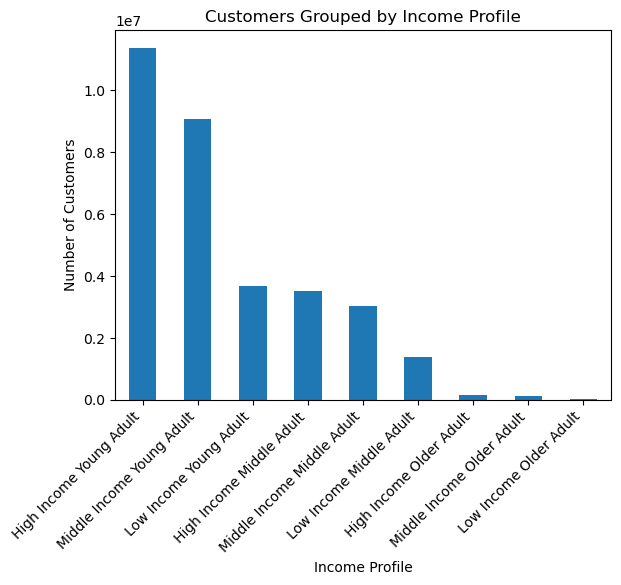

In [222]:
## Frequency chart for income profiles
income_profile_frequency_chart = df_profiles['income_profile'].value_counts().plot.bar()

plt.xlabel('Income Profile')
plt.ylabel('Number of Customers')
plt.title('Customers Grouped by Income Profile')
plt.xticks(ticks=range(len(x_axis_labels)), labels=x_axis_labels, rotation=45, ha='right')
plt.legend

plt.show()

In [220]:
df_profiles['income_profile'].value_counts()

income_profile
Middle-Income Middle-Aged Adult    11368988
Middle-Income Older Adult           9082423
Low-Income Middle-Aged Adult        3689673
Middle-Income Young Adult           3529375
Low-Income Young Adult              3030283
Low-Income Older Adult              1377407
High-Income Middle-Aged Adult        161174
High-Income Older Adult              120913
High-Income Young Adult               38354
Name: count, dtype: int64

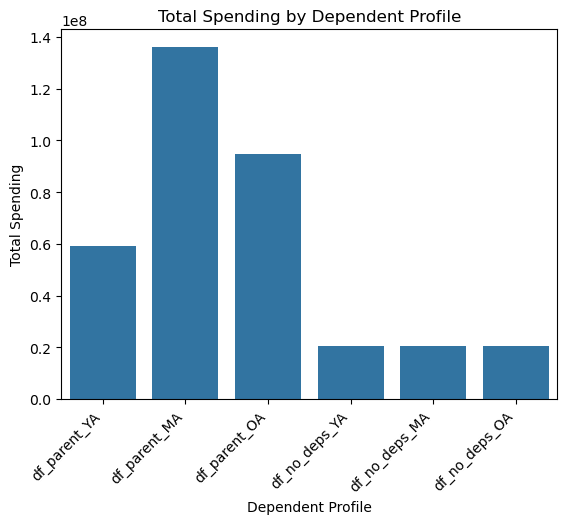

In [90]:
## Now to do the same for the dependent profiles
dependent_profile_spending_chart = sns.barplot(x='customer_profile', y='total_spending', data = dependent_profile_stats)

plt.xlabel('Dependent Profile')
plt.ylabel('Total Spending')
plt.title('Total Spending by Dependent Profile')
plt.xticks(rotation=45, ha='right')
plt.legend

plt.show()

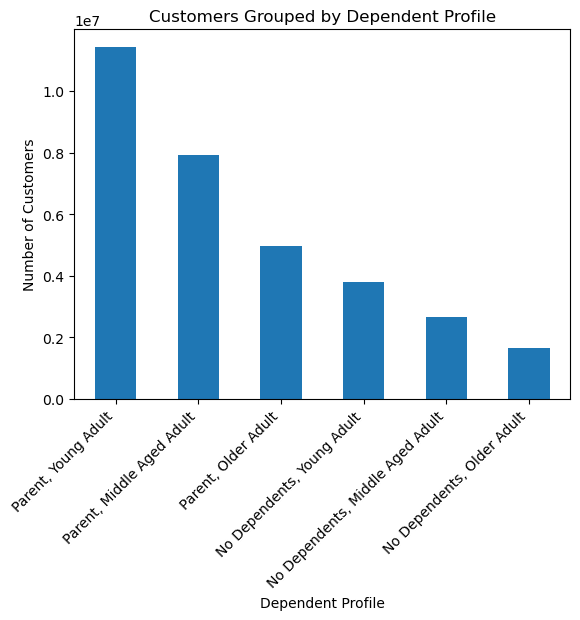

In [224]:
## Frequency chart for dependent profiles
x_axis_labels_dep = ['Parent, Young Adult', 'Parent, Middle Aged Adult', 'Parent, Older Adult', 'No Dependents, Young Adult', 'No Dependents, Middle Aged Adult', 'No Dependents, Older Adult']

dependent_profile_frequency_chart = df_profiles['dependent_profile'].value_counts().plot.bar()

plt.xlabel('Dependent Profile')
plt.ylabel('Number of Customers')
plt.title('Customers Grouped by Dependent Profile')
plt.xticks(ticks=range(len(x_axis_labels_dep)), labels=x_axis_labels_dep, rotation=45, ha='right')
plt.legend

plt.show()

In [91]:
## saving the charts above
dependent_profile_spending_chart.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/Total spending by dependent profile.png")

In [92]:
income_profile_spending_chart.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/Total spending by income profile.png")

## Chart for Usage Frequency by Profile

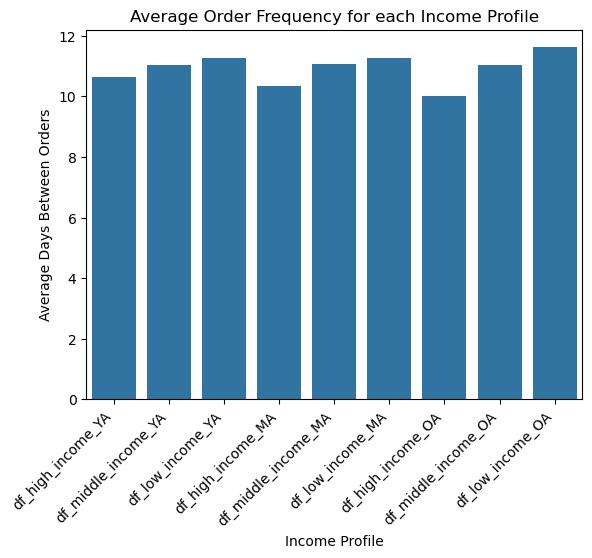

In [190]:
income_profile_frequency_chart = sns.barplot(x='customer_profile', y='avg_days_between_orders', data = income_profile_stats)

plt.xlabel('Income Profile')
plt.ylabel('Average Days Between Orders')
plt.title('Average Order Frequency for each Income Profile')
plt.xticks(rotation=45, ha='right')
plt.legend

plt.show()

In [ ]:
income_profile_frequency_chart = sns.barplot(x='customer_profile', y='avg_days_between_orders', data = income_profile_stats)

plt.xlabel('Income Profile')
plt.ylabel('Average Days Between Orders')
plt.title('Average Order Frequency for each Income Profile')
plt.xticks(rotation=45, ha='right')
plt.legend

plt.show()

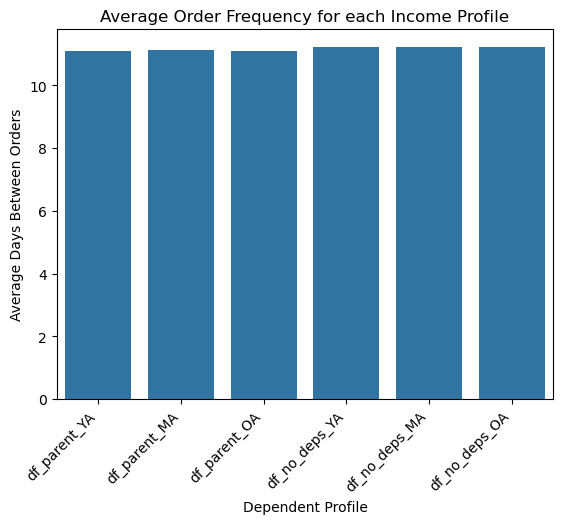

In [101]:
dependent_profile_frequency_chart = sns.barplot(x='customer_profile', y='avg_days_between_orders', data = dependent_profile_stats)

plt.xlabel('Dependent Profile')
plt.ylabel('Average Days Between Orders')
plt.title('Average Order Frequency for each Income Profile')
plt.xticks(rotation=45, ha='right')
plt.legend

plt.show()

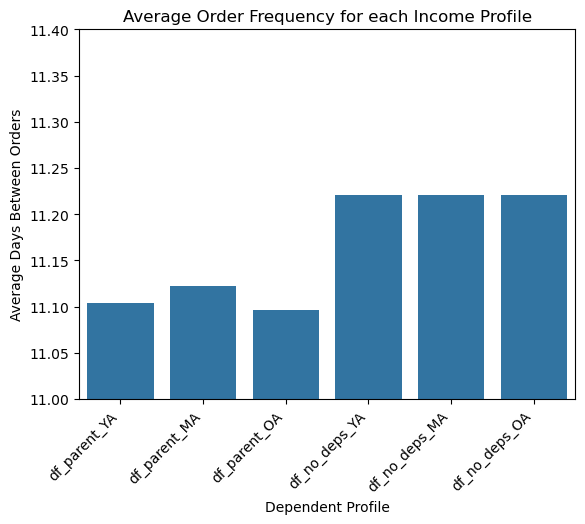

In [185]:
## Changing y-axis limit to make differences more visible
dependent_profile_frequency_chart = sns.barplot(x='customer_profile', y='avg_days_between_orders', data = dependent_profile_stats)

plt.xlabel('Dependent Profile')
plt.ylabel('Average Days Between Orders')
plt.title('Average Order Frequency for each Income Profile')
plt.xticks(rotation=45, ha='right')
plt.legend
plt.ylim(11, 11.4)

plt.show()

Parents tend to order slightly more frequently than those with no dependents, although the difference is fairly minimal.

In [103]:
## Saving Chart
dependent_profile_frequency_chart.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/AVG order frequency by dependent profile.png")
income_profile_frequency_chart.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/AVG order frequency by income profile.png")

## Grouping Customer Profiles by Region

In [110]:
# Create a cross-tab to count profiles in each region
income_profile_region = pd.crosstab(df_profiles['income_profile'], df_profiles['Region'])

# Get percentages within each profile
income_profile_region_pct = income_profile_region.div(income_profile_region.sum(axis=1), axis=0) * 100



In [115]:
#Same drill but for dependent profiles
# Create a cross-tab to count profiles in each region
dependent_profile_region = pd.crosstab(df_profiles['dependent_profile'], df_profiles['Region'])

# Get percentages within each profile
dependent_profile_region_pct = dependent_profile_region.div(dependent_profile_region.sum(axis=1), axis=0) * 100



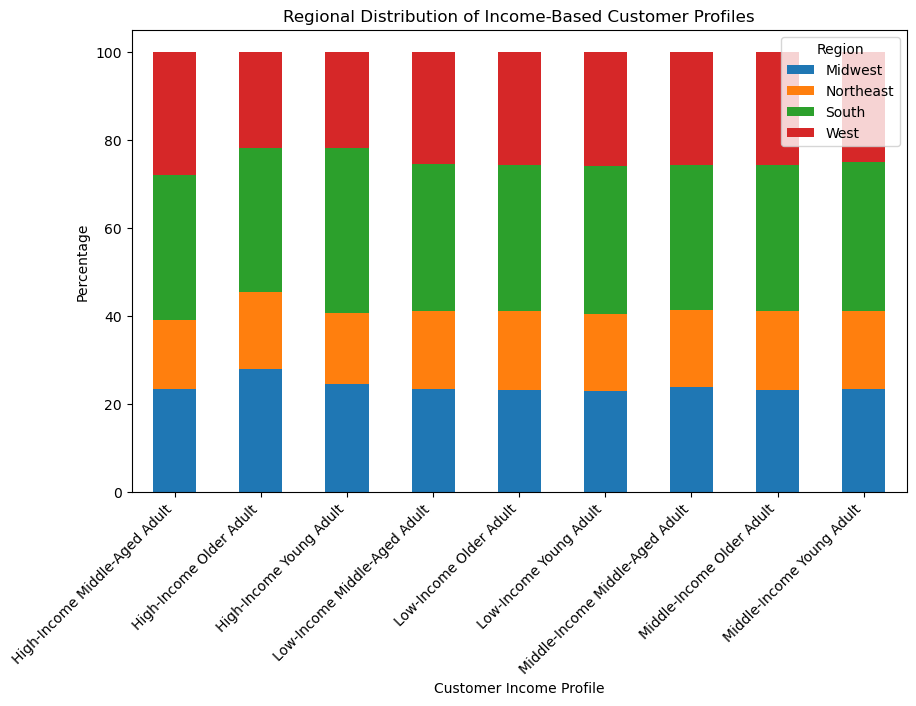

In [116]:
# Create a stacked bar chart
region_breakdown_by_income = income_profile_region_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Regional Distribution of Income-Based Customer Profiles')
plt.ylabel('Percentage')
plt.xlabel('Customer Income Profile')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.show()

It appears that most profiles have the highest percentage of customers in the South region. One interesting trend that appears too is that high-income older adults are noticeably more present in the Midwest.

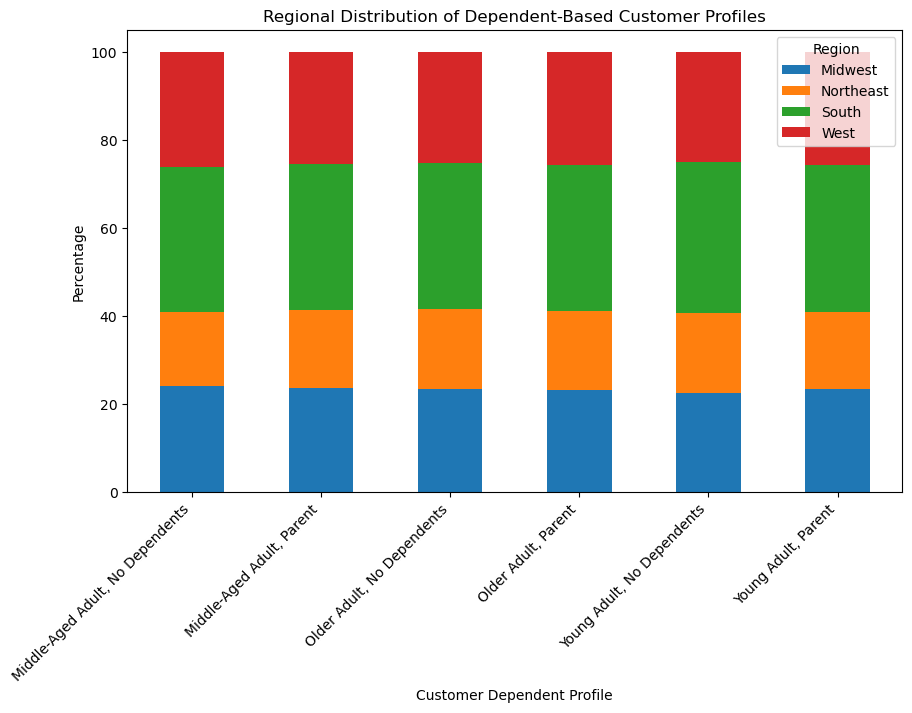

In [118]:
# Create another stacked bar chart
region_breakdown_by_dependent = dependent_profile_region_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Regional Distribution of Dependent-Based Customer Profiles')
plt.ylabel('Percentage')
plt.xlabel('Customer Dependent Profile')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.show()

In [ ]:
## Saving Figures
region_breakdown_by_dependent.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/region breakdown by dependent profile.png")
region_breakdown_by_income.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/region breakdown by income profile.png")

## Analyzing Most Ordered Department by Profile

In [ ]:
# Create a cross-tabulation to count departments within each profile
income_profile_department = pd.crosstab(df_profiles['income_profile'], df_profiles['department_id'])
dependent_profile_department = pd.crosstab(df_profiles['dependent_profile'], df_profiles['department_id'])

# Get the most frequently ordered department for each profile
income_most_ordered_dept = income_profile_department.idxmax(axis=1)
dependent_most_ordered_dept = dependent_profile_department.idxmax(axis=1)


In [ ]:
# Create a bar chart
income_top_departments = income_most_ordered_dept.plot(kind='bar', figsize=(10, 6))
plt.title('Most Ordered Department by Income Profile')
plt.ylabel('Department ID')
plt.xlabel('Income Profile')
plt.xticks(rotation=45, ha='right')
for p in income_top_departments.patches:
    income_top_departments.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                                    va = 'center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
# Create a bar chart for dependent profiles
dependent_top_departments = dependent_most_ordered_dept.plot(kind='bar', figsize=(10, 6))
plt.title('Most Ordered Department by Dependent Profile')
plt.ylabel('Department ID')
plt.xlabel('Dependent Profile')
plt.xticks(rotation=45, ha='right')
for p in dependent_top_departments.patches:
    dependent_top_departments.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                                    va = 'center', xytext=(0, 10), textcoords='offset points')

plt.show()

For both profiles, the most commonly ordered department is 4, which according to the project brief, is produce.

In [ ]:
# Export Graphs
dependent_top_departments.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/top department by dependent profile.png")
income_top_departments.figure.savefig("C:/Users/Sam/Documents/Data Analytics Projects/04 Analysis/Visualizations/top department by income profile.png")

## Additional Department Analysis

In [123]:
df_profiles.head()

product_id  department_id  prices  user_id  order_number  \
0           1             19     5.8      138            28   
1           1             19     5.8      138            30   
2           1             19     5.8      709             2   
3           1             19     5.8      764             1   
4           1             19     5.8      764             3   

   order_day_of_week  order_hour_of_day  days_since_last_order  reordered  \
0                  6                 11                    3.0          0   
1                  6                 17                   20.0          1   
2                  0                 21                    6.0          0   
3                  3                 13                    NaN          0   
4                  4                 17                    9.0          1   

         price_range  ... age num_dependents fam_status  income     Region  \
0  mid-range product  ...  81              1    married   49620    Midwest   
1  mid-range product  ...  81              1    married   49620    Midwest   
2  mid-range product  ...  66              2    married  158302  Northeast   
3  mid-range product  ...  40              3    married   31308    Midwest   
4  mid-range product  ...  40              3    married   31308    Midwest   

           age_group   income_group  dependent_status  \
0        Older Adult     Low-Income            Parent   
1        Older Adult     Low-Income            Parent   
2        Older Adult  Middle-Income            Parent   
3  Middle-Aged Adult     Low-Income            Parent   
4  Middle-Aged Adult     Low-Income            Parent   

                 income_profile          dependent_profile  
0        Low-Income Older Adult        Older Adult, Parent  
1        Low-Income Older Adult        Older Adult, Parent  
2     Middle-Income Older Adult        Older Adult, Parent  
3  Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  
4  Low-Income Middle-Aged Adult  Middle-Aged Adult, Parent  

[5 rows x 27 columns]

In [127]:
df_profiles['department_id'].value_counts()

department_id
4     9478126
16    5398004
19    2886902
7     2686644
1     2234358
13    1874990
3     1172278
15    1067953
20    1051110
9      866581
17     738258
12     708819
14     702937
11     447396
18     423777
6      269227
5      153547
8       97697
21      69140
2       36279
10      34567
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Orders by Department')

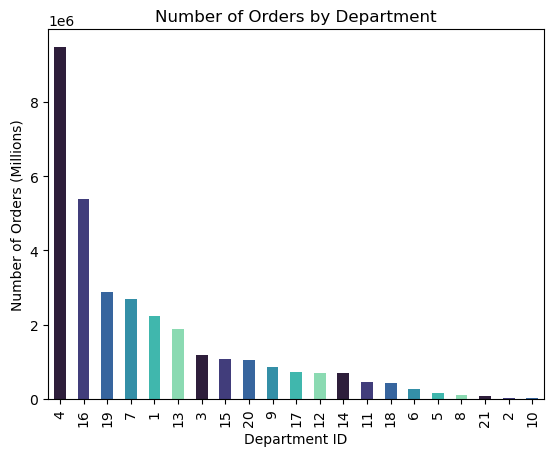

In [159]:
df_profiles['department_id'].value_counts().plot.bar(color = sns.color_palette('mako'))

plt.xlabel('Department ID')
plt.ylabel('Number of Orders (Millions)')

plt.title('Number of Orders by Department')

Text(0.5, 1.0, 'Number of Orders by Department')

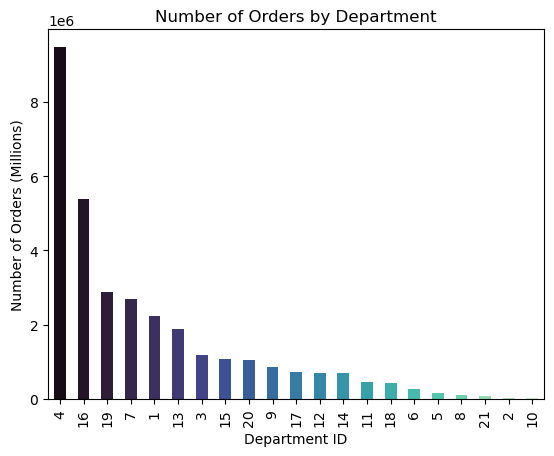

In [163]:
## Setting the number of bars the color gradient needs to cover
department_counts = df_profiles['department_id'].value_counts()
num_colors = len(department_counts)

## Applying color gradient to bars
df_profiles['department_id'].value_counts().plot.bar(color = sns.color_palette('mako', num_colors))

# Axis labels and title
plt.xlabel('Department ID')
plt.ylabel('Number of Orders (Millions)')
plt.title('Number of Orders by Department')

## Customer Loyalty Spending Habits

KeyboardInterrupt: 

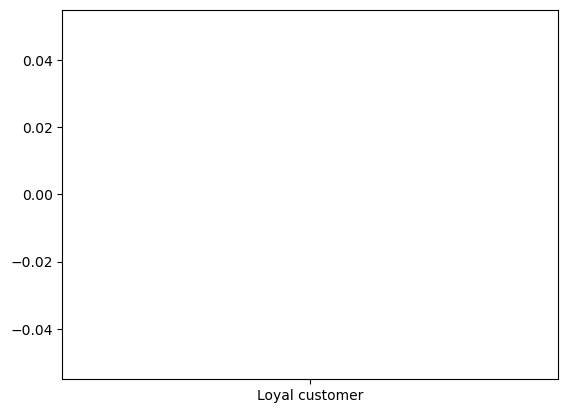

In [166]:
# Comparing spending for each loyalty flag
loyalty_spending_scatter = sns.barplot(x='loyalty_flag', y='prices', data=df_profiles)

# Add labels and title
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Spending')
plt.title('Average Spending by Loyalty Flag')

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\3731694159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = df_profiles.groupby('loyalty_flag')['prices'].mean()


Text(0.5, 1.0, 'Average Spending by Loyalty Flag')

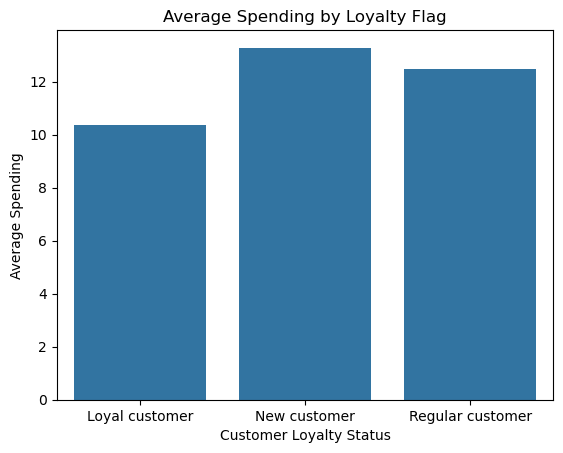

In [168]:
mean_prices = df_profiles.groupby('loyalty_flag')['prices'].mean()

# Comparing spending for each loyalty flag
loyalty_spending_bar = sns.barplot(x=mean_prices.index, y=mean_prices.values)

# Add labels and title
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Spending')
plt.title('Average Spending by Loyalty Flag')

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\98134771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_prices = df_profiles.groupby('loyalty_flag')['prices'].sum()


Text(0.5, 1.0, 'Total Spending by Loyalty Flag')

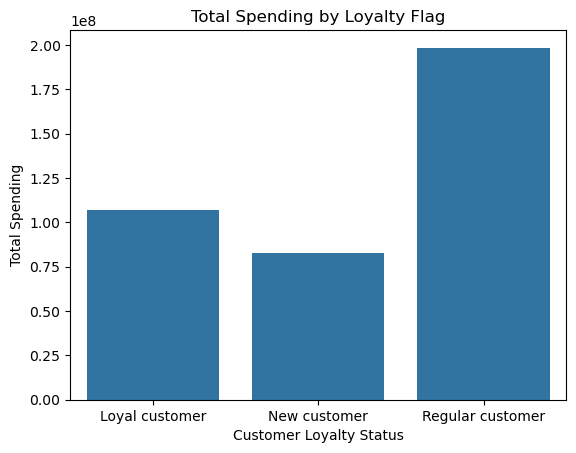

In [170]:
sum_prices = df_profiles.groupby('loyalty_flag')['prices'].sum()

# Comparing spending for each loyalty flag
loyalty_spending_bar = sns.barplot(x=sum_prices.index, y=sum_prices.values)

# Add labels and title
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Total Spending')
plt.title('Total Spending by Loyalty Flag')

In [172]:
df_profiles['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6237721
Name: count, dtype: int64

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\2444272409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending = df_profiles.groupby('loyalty_flag')['prices'].sum()


Text(0.5, 1.0, 'Average Spending per Customer by Loyalty Flag')

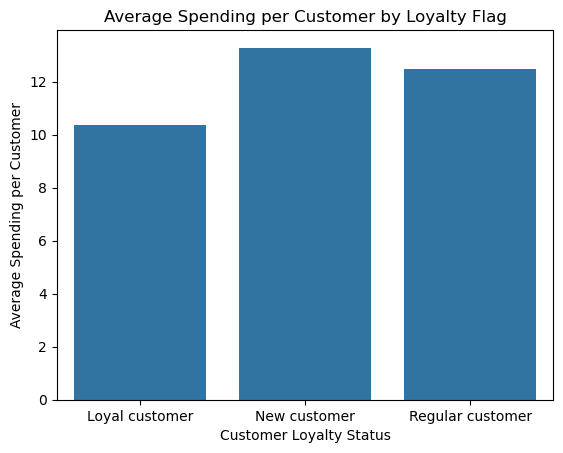

In [174]:
##Calculate average spending per loyalty flag
total_spending = df_profiles.groupby('loyalty_flag')['prices'].sum()
loyalty_counts = df_profiles['loyalty_flag'].value_counts()
avg_spending_per_flag = total_spending / loyalty_counts

## New bar chart with average spending per flag
loyalty_spending_bar = sns.barplot(x=avg_spending_per_flag.index, y=avg_spending_per_flag.values)

# labels and title
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Spending per Customer')
plt.title('Average Spending per Customer by Loyalty Flag')

## Additional Regional Analysis

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\4128030939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending = df_profiles.groupby('Region')['prices'].sum()


Text(0.5, 1.0, 'Average Spending for Each Region')

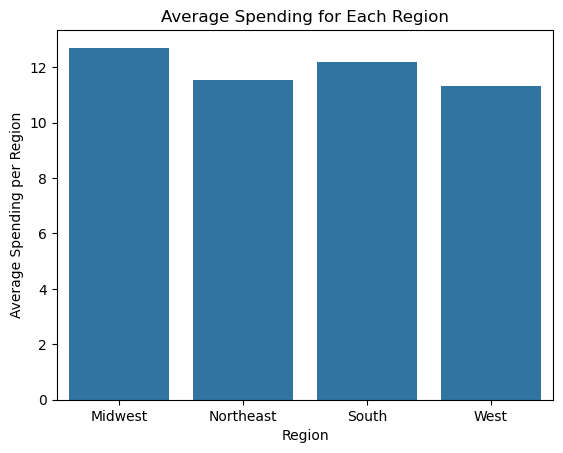

In [177]:
##Calculate average spending per Region
total_spending = df_profiles.groupby('Region')['prices'].sum()
region_counts = df_profiles['Region'].value_counts()
avg_spending_per_region = total_spending / region_counts

## New bar chart with average spending per region
region_spending_bar = sns.barplot(x=avg_spending_per_region.index, y=avg_spending_per_region.values)

# labels and title
plt.xlabel('Region')
plt.ylabel('Average Spending per Region')
plt.title('Average Spending for Each Region')

C:\Users\Sam\AppData\Local\Temp\ipykernel_19116\3642053277.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_region_prices = df_profiles.groupby('Region')['prices'].sum()


Text(0.5, 1.0, 'Total Spending by Region')

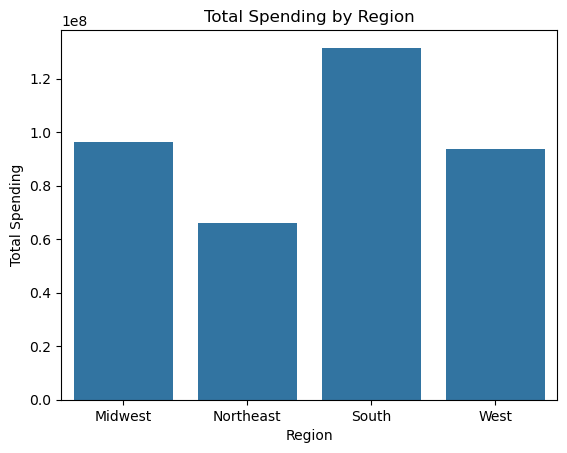

In [179]:
# Calculating Total Spending by region to see if it's significant
sum_region_prices = df_profiles.groupby('Region')['prices'].sum()

# Comparing spending for each loyalty flag
region_spending_bar = sns.barplot(x=sum_region_prices.index, y=sum_region_prices.values)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.title('Total Spending by Region')

## Spending vs. Hour of the Day

Text(0.5, 1.0, 'Total Spending for Each Hour of the Day')

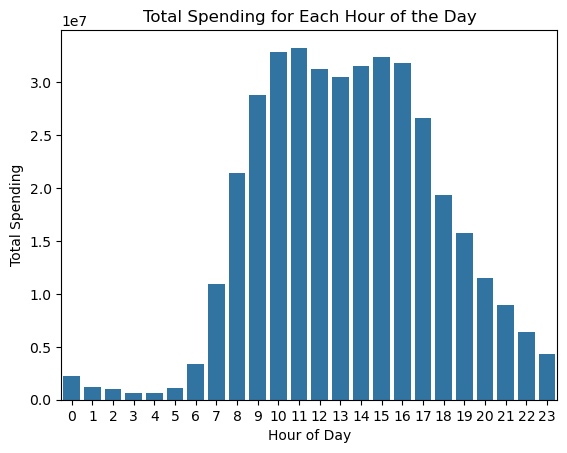

In [206]:
##Calculate total spending for each hour of the day
total_spending_HOD = df_profiles.groupby('order_hour_of_day')['prices'].sum()

## New bar chart with total spending by hour
HOD_total_spending = sns.barplot(x=total_spending_HOD.index, y=total_spending_HOD.values)

# labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Total Spending')
plt.title('Total Spending for Each Hour of the Day')

## Price Range Visualizations

(array([0, 1, 2]),
 [Text(0, 0, 'mid-range product'),
  Text(1, 0, 'low-range product'),
  Text(2, 0, 'high-range product')])

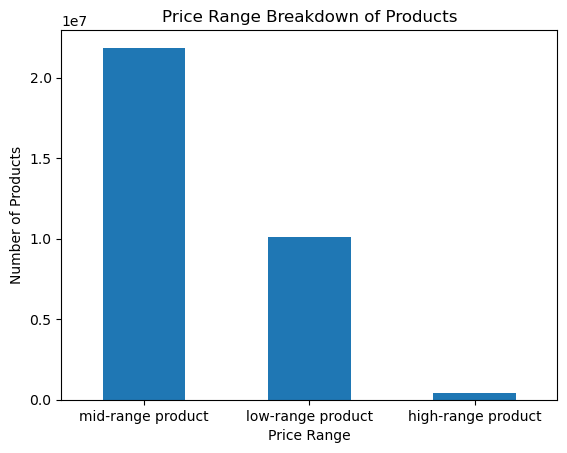

In [244]:
df_profiles['price_range'].value_counts().plot.bar()

plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.title('Price Range Breakdown of Products')
plt.xticks(rotation=0, ha='center')